# Convolutional Neural Networks: Street View Housing Number Digit Recognition

### Context: 

The Street View House Numbers (SVHN) dataset is one of the most popular ones. It has been used in neural networks created by Google to read house numbers and match them to their geolocations. This is a great benchmark dataset to play with, learn and train models that accurately identify street numbers, and incorporate into all sorts of projects.

### Objective:
The objective of the exercise is to perform an image classification exercise on the given dataset to come up with a model that can help identify the digit images which have issues like picture brightness, blurriness. 



In [1]:
import tensorflow as tf
print(tf.__version__)

2.4.0


In [2]:
import h5py
import numpy as np

h5f = h5py.File('SVHN_single_grey1.h5', 'r')

# Load the training and the test set
X_train = h5f['X_train'][:]
y_train1 = h5f['y_train'][:]
X_test = h5f['X_test'][:]
y_test1 = h5f['y_test'][:]

# Close this file
h5f.close()

In [3]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, BatchNormalization, Dropout, Flatten, LeakyReLU
from tensorflow.keras.utils import to_categorical

# fix random seed for reproducibility
seed = 7
np.random.seed(seed)

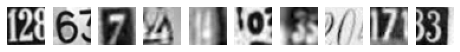

label for each of the above image: [2 6 7 4 4 0 3 0 7 3]


In [4]:
# visualizing the first 10 images in the dataset and their labels

%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 8))
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(X_train[i], cmap="gray")
    plt.axis('off')
plt.show()
print('label for each of the above image: %s' % (y_train1[0:10]))

In [5]:
# Find out shape of the images
print("Shape:", X_train[0].shape)
print()
print("First image:\n", X_train[0])

Shape: (32, 32)

First image:
 [[ 33.0704  30.2601  26.852  ...  71.4471  58.2204  42.9939]
 [ 25.2283  25.5533  29.9765 ... 113.0209 103.3639  84.2949]
 [ 26.2775  22.6137  40.4763 ... 113.3028 121.775  115.4228]
 ...
 [ 28.5502  36.212   45.0801 ...  24.1359  25.0927  26.0603]
 [ 38.4352  26.4733  23.2717 ...  28.1094  29.4683  30.0661]
 [ 50.2984  26.0773  24.0389 ...  49.6682  50.853   53.0377]]


In [6]:
# Reshaping the dataset from 2D into a 3D data where there is just one channel
X_train = X_train.reshape(X_train.shape[0], 32, 32, 1)
X_test = X_test.reshape(X_test.shape[0], 32, 32, 1)

In [7]:
# Normalize inputs from 0-255 to 0-1
X_train = X_train.astype('float32')/255
X_test = X_test.astype('float32')/255

In [8]:
# New shape 
print('Training set:', X_train.shape, y_train1.shape)
print('Test set:', X_test.shape, y_test1.shape)

Training set: (42000, 32, 32, 1) (42000,)
Test set: (18000, 32, 32, 1) (18000,)


In [9]:
# one hot encode output
y_train = tf.keras.utils.to_categorical(y_train1)
y_test = tf.keras.utils.to_categorical(y_test1)

In [10]:
# define model
from tensorflow.keras import losses
from tensorflow.keras import optimizers

def cnn_model_1():
    model_1 = Sequential()
    # Two convolution layers and pooling layer
    # First Convolutional layer with 16 filters and kernel size =3. Use the 'same' padding and provide apt input shape.
    model_1.add(Conv2D(filters=16, kernel_size=(3, 3), padding='same', input_shape=(32,32,1)))

    # Add a leaky relu layer next with the value 0.1 
    model_1.add(LeakyReLU(alpha=0.1))

    # First Convolutional layer with 32 filters and kernel size =3. Use the 'same' padding
    model_1.add(Conv2D(filters=32, kernel_size=(3, 3), padding='same'))

    # Another leakyRelu same as above
    model_1.add(LeakyReLU(alpha=0.1))

    # A maxpooling layer with pool size of 2
    model_1.add(MaxPooling2D(pool_size=(2, 2)))

    # Flattening the model and making room for the fully connected component
    model_1.add(Flatten())

    # Add a dense layer with 32 nodes
    model_1.add(Dense(32))

    # Add a leakyRelu layer with slope(0.1)
    model_1.add(LeakyReLU(alpha=0.1))

    # Add the final output layer with nodes equal to the number of classes and softmax activation
    model_1.add(Dense(10, activation='softmax'))

    # Compile the model with the categorical_crossentropy loss, adam optmizers (lr = 0.001) and accuracy metric
    adam = tf.keras.optimizers.Adam(lr=1e-3)
    model_1.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
    return model_1

In [11]:
# Call the function and print the model summary
model_1 = cnn_model_1()
model_1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 16)        160       
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 32, 32, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        4640      
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 8192)              0         
_________________________________________________________________
dense (Dense)                (None, 32)                2

In [12]:
# Fit the model and save the history
history_model_1 = model_1.fit (X_train, y_train, validation_split=0.2, verbose=1, epochs=20, batch_size=32)

Epoch 1/20
1050/1050 [==============================] - 31s 29ms/step - loss: 1.6746 - accuracy: 0.4074 - val_loss: 0.6315 - val_accuracy: 0.8193
Epoch 2/20
1050/1050 [==============================] - 33s 32ms/step - loss: 0.5600 - accuracy: 0.8379 - val_loss: 0.5297 - val_accuracy: 0.8548
Epoch 3/20
1050/1050 [==============================] - 34s 32ms/step - loss: 0.4614 - accuracy: 0.8659 - val_loss: 0.4931 - val_accuracy: 0.8648
Epoch 4/20
1050/1050 [==============================] - 35s 33ms/step - loss: 0.3877 - accuracy: 0.8863 - val_loss: 0.4747 - val_accuracy: 0.8645
Epoch 5/20
1050/1050 [==============================] - 34s 33ms/step - loss: 0.3462 - accuracy: 0.8961 - val_loss: 0.4660 - val_accuracy: 0.8662
Epoch 6/20
1050/1050 [==============================] - 34s 32ms/step - loss: 0.3036 - accuracy: 0.9085 - val_loss: 0.4673 - val_accuracy: 0.8738
Epoch 7/20
1050/1050 [==============================] - 34s 32ms/step - loss: 0.2680 - accuracy: 0.9200 - val_loss: 0.4870 -

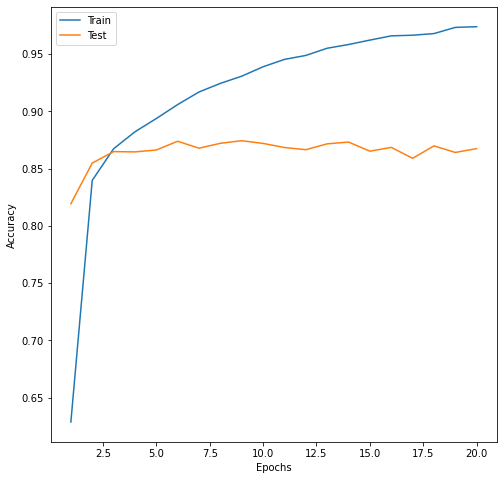

In [13]:
# plotting the accuracies

dict_hist = history_model_1.history
list_ep = [i for i in range(1,21)]

plt.figure(figsize = (8,8))
plt.plot(list_ep,dict_hist['accuracy'])
plt.plot(list_ep,dict_hist['val_accuracy'])
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [14]:
# The accuracy for train set is very hight. 
# The variance between train and validation is high too. 
# It suggests an over-fitting, so need to adjust the model
def cnn_model_2():
    # initialized a sequential model
    model_2 = Sequential()

    # Two convolution layers and pooling layer
    # First Convolutional layer with 16 filters and kernel size =3. Use the 'same' padding and provide apt input shape.
    model_2.add(Conv2D(filters=16, kernel_size=(3, 3), padding='same', input_shape=(32,32, 1)))

    # Add a leaky relu layer next with the value 0.1 
    model_2.add(LeakyReLU(alpha=0.1))

    # adding dropout to randomly switch off 20% neurons to reduce overfitting
    model_2.add(Dropout(0.2))

    # First Convolutional layer with 32 filters and kernel size =3. Use the 'same' padding
    model_2.add(Conv2D(filters=32, kernel_size=(3, 3), padding='same'))

    # Another leakyRelu same as above
    model_2.add(LeakyReLU(alpha=0.1))

    # adding dropout to randomly switch off 20% neurons to reduce overfitting
    model_2.add(Dropout(0.2))

    # A maxpooling layer with pool size of 2
    model_2.add(MaxPooling2D(pool_size=(2, 2)))

    # Flattening the model and making room for the fully connected component
    model_2.add(Flatten())

    # Add a dense layer with 32 nodes
    model_2.add(Dense(32))

    # Add a leakyRelu layer with slope(0.1)
    model_2.add(LeakyReLU(alpha=0.1))

    # adding dropout to randomly switch off 50% neurons to reduce overfitting
    model_2.add(Dropout(0.5))

    # Add the final output layer with nodes equal to the number of classes and softmax activation
    model_2.add(Dense(10, activation='softmax'))

    # Compile the model with the categorical_crossentropy loss, adam optmizers (lr = 0.001) and accuracy metric
    adam = tf.keras.optimizers.Adam(lr=1e-3)
    model_2.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
    return model_2

In [15]:
#Call the function and print model summary
model_2 = cnn_model_2()
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 32, 32, 16)        160       
_________________________________________________________________
leaky_re_lu_3 (LeakyReLU)    (None, 32, 32, 16)        0         
_________________________________________________________________
dropout (Dropout)            (None, 32, 32, 16)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 32, 32, 32)        4640      
_________________________________________________________________
leaky_re_lu_4 (LeakyReLU)    (None, 32, 32, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)       

In [16]:
# Fit the model
history_model_2 = model_2.fit(X_train, y_train, validation_split=0.2, verbose=1, epochs=20, batch_size=32)

Epoch 1/20
1050/1050 [==============================] - 54s 51ms/step - loss: 1.8511 - accuracy: 0.3240 - val_loss: 0.6656 - val_accuracy: 0.8143
Epoch 2/20
1050/1050 [==============================] - 54s 51ms/step - loss: 0.8454 - accuracy: 0.7365 - val_loss: 0.5675 - val_accuracy: 0.8342
Epoch 3/20
1050/1050 [==============================] - 53s 50ms/step - loss: 0.7141 - accuracy: 0.7801 - val_loss: 0.5199 - val_accuracy: 0.8464
Epoch 4/20
1050/1050 [==============================] - 53s 50ms/step - loss: 0.6542 - accuracy: 0.7951 - val_loss: 0.4756 - val_accuracy: 0.8574
Epoch 5/20
1050/1050 [==============================] - 51s 48ms/step - loss: 0.6356 - accuracy: 0.8012 - val_loss: 0.4941 - val_accuracy: 0.8502
Epoch 6/20
1050/1050 [==============================] - 51s 49ms/step - loss: 0.6061 - accuracy: 0.8099 - val_loss: 0.5012 - val_accuracy: 0.8538
Epoch 7/20
1050/1050 [==============================] - 50s 47ms/step - loss: 0.5697 - accuracy: 0.8202 - val_loss: 0.4755 -

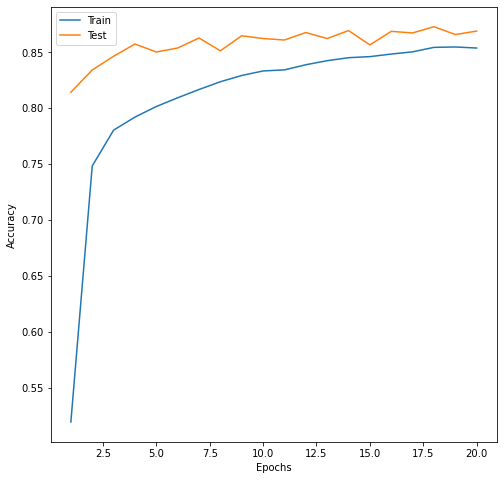

In [17]:
# plotting the accuracies
dict_hist = history_model_2.history
list_ep = [i for i in range(1,21)]

plt.figure(figsize = (8,8))
plt.plot(list_ep,dict_hist['accuracy'])
plt.plot(list_ep,dict_hist['val_accuracy'])
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [18]:
# Model_2 reduces the overfitting issue form model_1
# predict on the test dataset with model_2
test_pred = np.argmax(model_2.predict(X_test), axis=-1)

#Print the classificatio report
from sklearn.metrics import classification_report
print(classification_report(y_test1, test_pred ))

              precision    recall  f1-score   support

           0       0.91      0.89      0.90      1814
           1       0.75      0.94      0.84      1828
           2       0.88      0.90      0.89      1803
           3       0.82      0.80      0.81      1719
           4       0.91      0.89      0.90      1812
           5       0.85      0.87      0.86      1768
           6       0.89      0.83      0.86      1832
           7       0.91      0.89      0.90      1808
           8       0.88      0.81      0.84      1812
           9       0.90      0.84      0.87      1804

    accuracy                           0.87     18000
   macro avg       0.87      0.87      0.87     18000
weighted avg       0.87      0.87      0.87     18000



In [19]:
# The classfication report show that class 1, 4, and 0 have the highest 
# recall that is over 90%. Class 3 has the lowest racall rate of 79%. 
# The model has overall 87% of accuracy, which is a good model.